# Flight Price Prediction

### Import Libraries

In [1]:
# Scientific computing packages
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#datetime package
import datetime as dt
import time

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df=pd.read_excel('C:/Users/Lenovo-PC/Desktop/Internship/Assignment_10_FlightPricePrediction/Flight Price Prediction Project/Flightprice_Dataset.xls')
df.head()

Airline Date_of_Journey     Source Destination Departure_Time  \
0  Air Asia          01 Mar  New Delhi      Mumbai          08:20   
1  Air Asia          01 Mar  New Delhi      Mumbai          20:45   
2  Air Asia          01 Mar  New Delhi      Mumbai          19:00   
3  Air Asia          01 Mar  New Delhi      Mumbai          22:10   
4  SpiceJet          01 Mar  New Delhi      Mumbai          19:45   

  Arrival_Time Duration Total_Stops  Price  
0        14:10   5h 50m      1 Stop   5952  
1        07:15  10h 30m      1 Stop   5952  
2        07:15  12h 15m      1 Stop   5952  
3        12:25  14h 15m      1 Stop   5952  
4        22:05   2h 20m    Non Stop   5953

Dataset is having numeric,date and categorical columns.

### Project Description

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here dataset is having the prices of flight tickets for various airlines between the months of March and May of 2022 and between various cities.

FEATURES:
Airline: The name of the airline.
Date_of_Journey: The date of the journey
Source: The source from which the service begins.
Destination: The destination where the service ends.
Departure_Time: The time when the journey starts from the source.
Arrival_Time: Time of arrival at the destination.
Duration: Total duration of the flight.
Total_Stops: Total stops between the source and destination.

Price: The price of the ticket, is the target columns having numeric values, hence this is a regression problem.

In [3]:
#Checking the dataset shape
df.shape

(6752, 9)

Dataset is having 6752 rows and 9 columns (8 input features and 1 output feature).

In [4]:
# Checking columns
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Departure_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

Columns names are displayed where 'Price' is the target variable and all other are independent variables.

In [5]:
# Checking datatypes
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Departure_Time     object
Arrival_Time       object
Duration           object
Total_Stops        object
Price               int64
dtype: object

Here, we can see independent columns are of type object and target column is of integer type i.e. both categorical and numeric columns are there in the dataset.

In [6]:
# Checking dataset schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6752 entries, 0 to 6751
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          6752 non-null   object
 1   Date_of_Journey  6752 non-null   object
 2   Source           6752 non-null   object
 3   Destination      6752 non-null   object
 4   Departure_Time   6752 non-null   object
 5   Arrival_Time     6752 non-null   object
 6   Duration         6752 non-null   object
 7   Total_Stops      6752 non-null   object
 8   Price            6752 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 474.9+ KB


It gives additional information regarding the dataset like RangeIndex, Data columns, datatypes. We can see there are no null values in the dataset. Date_of_Journey, Departure_Time & Arrival_Time are of object type we can convert this to relevant format.

### Data Preprocessing

In [7]:
# Checking which all column values are relevant for model training
for i in df.columns :
    print(i,' : ', df[i].dtypes)
    print('Unique values : ',df[i].nunique())
    print('Value counts  : ',df[i].value_counts())
    print('----------------------')

Airline  :  object
Unique values :  6
Value counts  :  IndiGo       2800
Air India    1134
Go First      932
Vistara       855
Air Asia      749
SpiceJet      282
Name: Airline, dtype: int64
----------------------
Date_of_Journey  :  object
Unique values :  41
Value counts  :  17 Apr    288
01 Apr    281
31 Mar    274
15 Apr    269
23 Apr    268
09 Apr    263
05 Mar    250
07 Mar    250
25 Apr    247
07 Apr    236
05 Apr    236
03 Apr    236
13 Apr    234
01 Mar    220
27 Apr    219
15 Mar    215
27 Mar    200
29 Mar    200
03 Mar    195
29 Apr    179
25 Mar    175
21 Mar    175
17 Mar    175
11 Mar    175
13 Mar    175
19 Apr    171
19 Mar    105
05 May     93
11 May     92
03 May     87
09 May     85
01 May     73
27 May     71
15 May     69
25 May     50
29 May     47
17 May     47
23 May     46
13 May     39
31 May     22
21 May     20
Name: Date_of_Journey, dtype: int64
----------------------
Source  :  object
Unique values :  4
Value counts  :  New Delhi    2573
Mumbai       2450

Data types of few columns need to be changed and feature engineering is required here to add separate columns based on values in Date_of_Journey, Departure_Time, Arrival_Time, Duration, Total_Stops. Target column 'Price' has numeric values.

In [8]:
# Checking the null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Departure_Time     0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

There are no nulls in the dataset.

### Feature Engineering

In [9]:
# Treating Date_of_Journey column
df['Month_of_Journey']=df['Date_of_Journey'].str.split(' ')
df['Month_of_Journey']=df['Month_of_Journey'].str[1]

df['Date_of_Journey']=df['Date_of_Journey'].str.split(' ')
df['Date_of_Journey']=df['Date_of_Journey'].str[0]

df.head()

Airline Date_of_Journey     Source Destination Departure_Time  \
0  Air Asia              01  New Delhi      Mumbai          08:20   
1  Air Asia              01  New Delhi      Mumbai          20:45   
2  Air Asia              01  New Delhi      Mumbai          19:00   
3  Air Asia              01  New Delhi      Mumbai          22:10   
4  SpiceJet              01  New Delhi      Mumbai          19:45   

  Arrival_Time Duration Total_Stops  Price Month_of_Journey  
0        14:10   5h 50m      1 Stop   5952              Mar  
1        07:15  10h 30m      1 Stop   5952              Mar  
2        07:15  12h 15m      1 Stop   5952              Mar  
3        12:25  14h 15m      1 Stop   5952              Mar  
4        22:05   2h 20m    Non Stop   5953              Mar

In [10]:
# Treating Month_of_Journey column 
df['Month_of_Journey'].replace('Mar','03',inplace=True)
df['Month_of_Journey'].replace('Apr','04',inplace=True)
df['Month_of_Journey'].replace('May','05',inplace=True)
df.head()

Airline Date_of_Journey     Source Destination Departure_Time  \
0  Air Asia              01  New Delhi      Mumbai          08:20   
1  Air Asia              01  New Delhi      Mumbai          20:45   
2  Air Asia              01  New Delhi      Mumbai          19:00   
3  Air Asia              01  New Delhi      Mumbai          22:10   
4  SpiceJet              01  New Delhi      Mumbai          19:45   

  Arrival_Time Duration Total_Stops  Price Month_of_Journey  
0        14:10   5h 50m      1 Stop   5952               03  
1        07:15  10h 30m      1 Stop   5952               03  
2        07:15  12h 15m      1 Stop   5952               03  
3        12:25  14h 15m      1 Stop   5952               03  
4        22:05   2h 20m    Non Stop   5953               03

In [11]:
# Converting the datetime columns to relevant datatype
for i in ['Departure_Time','Arrival_Time'] :
    df[i]=pd.to_datetime(df[i])
df.dtypes

Airline                     object
Date_of_Journey             object
Source                      object
Destination                 object
Departure_Time      datetime64[ns]
Arrival_Time        datetime64[ns]
Duration                    object
Total_Stops                 object
Price                        int64
Month_of_Journey            object
dtype: object

In [12]:
# Treating column Dep_Time
df['Dep_Time_Hour']=df['Departure_Time'].dt.hour
df['Dep_Time_Minute']=df['Departure_Time'].dt.minute

# Dropping Dep_Time column
df.drop('Departure_Time',axis=1,inplace=True)

# Checking dataset
df.head(3)

Airline Date_of_Journey     Source Destination        Arrival_Time  \
0  Air Asia              01  New Delhi      Mumbai 2022-02-28 14:10:00   
1  Air Asia              01  New Delhi      Mumbai 2022-02-28 07:15:00   
2  Air Asia              01  New Delhi      Mumbai 2022-02-28 07:15:00   

  Duration Total_Stops  Price Month_of_Journey  Dep_Time_Hour  Dep_Time_Minute  
0   5h 50m      1 Stop   5952               03              8               20  
1  10h 30m      1 Stop   5952               03             20               45  
2  12h 15m      1 Stop   5952               03             19                0

In [13]:
# Treating column Arrival_Time
df['Arrival_Time_Hour']=df['Arrival_Time'].dt.hour
df['Arrival_Time_Minute']=df['Arrival_Time'].dt.minute

# Dropping Dep_Time column
df.drop('Arrival_Time',axis=1,inplace=True)

# Checking dataset
df.head(3)

Airline Date_of_Journey     Source Destination Duration Total_Stops  \
0  Air Asia              01  New Delhi      Mumbai   5h 50m      1 Stop   
1  Air Asia              01  New Delhi      Mumbai  10h 30m      1 Stop   
2  Air Asia              01  New Delhi      Mumbai  12h 15m      1 Stop   

   Price Month_of_Journey  Dep_Time_Hour  Dep_Time_Minute  Arrival_Time_Hour  \
0   5952               03              8               20                 14   
1   5952               03             20               45                  7   
2   5952               03             19                0                  7   

   Arrival_Time_Minute  
0                   10  
1                   15  
2                   15

In [14]:
# Treating column Duration
df['Duration1']=df.Duration.str.split(' ')

# Creating columns from Duration
df['Duration_hour']=df.Duration1.str[0]
df['Duration_hour']=df.Duration_hour.str.split('h')
df['Duration_hour']=df.Duration_hour.str[0]

df['Duration_minute']=df.Duration1.str[1]
df['Duration_minute']=df.Duration_minute.str.split('m')
df['Duration_minute']=df.Duration_minute.str[0]

# Dropping the Duration and Duration1 columns
df.drop(['Duration','Duration1'],axis=1,inplace=True)

# Checking the dataset
df.head(3)

Airline Date_of_Journey     Source Destination Total_Stops  Price  \
0  Air Asia              01  New Delhi      Mumbai      1 Stop   5952   
1  Air Asia              01  New Delhi      Mumbai      1 Stop   5952   
2  Air Asia              01  New Delhi      Mumbai      1 Stop   5952   

  Month_of_Journey  Dep_Time_Hour  Dep_Time_Minute  Arrival_Time_Hour  \
0               03              8               20                 14   
1               03             20               45                  7   
2               03             19                0                  7   

   Arrival_Time_Minute Duration_hour Duration_minute  
0                   10             5              50  
1                   15            10              30  
2                   15            12              15

In [15]:
# Treating column Total_Stops
df['Total_Stops']=df.Total_Stops.str.split(' ')

# Updating column from Total_Stops
df['Total_Stops']=df.Total_Stops.str[0]

# Replacing non-stop value in column Total_Stops
df['Total_Stops'].replace('Non',0,inplace=True)

# Checking the dataset
df.head(3)

Airline Date_of_Journey     Source Destination Total_Stops  Price  \
0  Air Asia              01  New Delhi      Mumbai           1   5952   
1  Air Asia              01  New Delhi      Mumbai           1   5952   
2  Air Asia              01  New Delhi      Mumbai           1   5952   

  Month_of_Journey  Dep_Time_Hour  Dep_Time_Minute  Arrival_Time_Hour  \
0               03              8               20                 14   
1               03             20               45                  7   
2               03             19                0                  7   

   Arrival_Time_Minute Duration_hour Duration_minute  
0                   10             5              50  
1                   15            10              30  
2                   15            12              15

In [16]:
# Checking dataset shape
df.shape

(6752, 13)

### Data Wrangling

In [17]:
# Checking column values after doing feature engineering
for i in df.columns :
    print(i,' : ', df[i].dtypes)
    print('Unique values : ',df[i].nunique())
    print('Value counts  : ',df[i].value_counts())
    print('----------------------')

Airline  :  object
Unique values :  6
Value counts  :  IndiGo       2800
Air India    1134
Go First      932
Vistara       855
Air Asia      749
SpiceJet      282
Name: Airline, dtype: int64
----------------------
Date_of_Journey  :  object
Unique values :  16
Value counts  :  05    579
01    574
15    553
03    518
17    510
27    490
07    486
25    472
13    448
29    426
09    348
23    314
31    296
19    276
11    267
21    195
Name: Date_of_Journey, dtype: int64
----------------------
Source  :  object
Unique values :  4
Value counts  :  New Delhi    2573
Mumbai       2450
Hyderabad     974
Bangalore     755
Name: Source, dtype: int64
----------------------
Destination  :  object
Unique values :  5
Value counts  :  Hyderabad    1677
Mumbai       1459
Chennai      1451
Bangalore    1148
New Delhi    1017
Name: Destination, dtype: int64
----------------------
Total_Stops  :  object
Unique values :  4
Value counts  :  0    4171
1    2475
2     105
3       1
Name: Total_Stops, dtype

Date_of_Journey,Month_of_Journey,Total_Stops, Duration_hour, Duration_minute should be of integer type. 

In [18]:
# Converting datatypes of Total_Stops, Duration_hour, Duration_minute which should be of integer type.
df['Date_of_Journey']=df['Date_of_Journey'].astype('int64')
df['Month_of_Journey']=pd.to_numeric(df['Month_of_Journey'])
df['Total_Stops']=df['Total_Stops'].astype('int64')
df['Duration_hour']=pd.to_numeric(df['Duration_hour'])
df['Duration_minute']=df['Duration_minute'].astype('int64')

In [19]:
# Checking data informaton
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6752 entries, 0 to 6751
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              6752 non-null   object
 1   Date_of_Journey      6752 non-null   int64 
 2   Source               6752 non-null   object
 3   Destination          6752 non-null   object
 4   Total_Stops          6752 non-null   int64 
 5   Price                6752 non-null   int64 
 6   Month_of_Journey     6752 non-null   int64 
 7   Dep_Time_Hour        6752 non-null   int64 
 8   Dep_Time_Minute      6752 non-null   int64 
 9   Arrival_Time_Hour    6752 non-null   int64 
 10  Arrival_Time_Minute  6752 non-null   int64 
 11  Duration_hour        6752 non-null   int64 
 12  Duration_minute      6752 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 685.9+ KB


There are no nulls and all the datatypes seem good now to the corresponding column values.

In [20]:
# Checking for the duplicates in the dataset
df[df.duplicated()].count()

Airline                42
Date_of_Journey        42
Source                 42
Destination            42
Total_Stops            42
Price                  42
Month_of_Journey       42
Dep_Time_Hour          42
Dep_Time_Minute        42
Arrival_Time_Hour      42
Arrival_Time_Minute    42
Duration_hour          42
Duration_minute        42
dtype: int64

There are 42 duplicate values in the dataset.

In [21]:
# Checking for the duplicate rows
df[(df['Airline']=='Air Asia')&(df['Date_of_Journey']==27)&(df['Month_of_Journey']==3)&(df['Dep_Time_Hour']==20)&(df['Destination']=='Hyderabad')]

Airline  Date_of_Journey  Source Destination  Total_Stops  Price  \
1634  Air Asia               27  Mumbai   Hyderabad            1   3306   
1635  Air Asia               27  Mumbai   Hyderabad            1   3306   

      Month_of_Journey  Dep_Time_Hour  Dep_Time_Minute  Arrival_Time_Hour  \
1634                 3             20               10                  8   
1635                 3             20               10                  8   

      Arrival_Time_Minute  Duration_hour  Duration_minute  
1634                   45             12               35  
1635                   45             12               35

In [22]:
# Treating duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().any()

False

There are no duplicates in the dataset.

In [23]:
# Checking shape of new dataset
df.shape

(6710, 13)

Dataset is having 6710 rows and 13 columns after data cleaning.

### EDA and Visualizations

<AxesSubplot:>

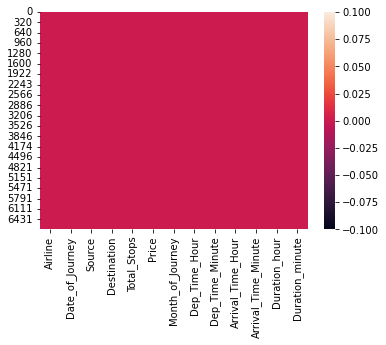

In [24]:
# Visualizing nulls
sns.heatmap(df.isnull())

Heatmap showing 0 null values in the dataset.

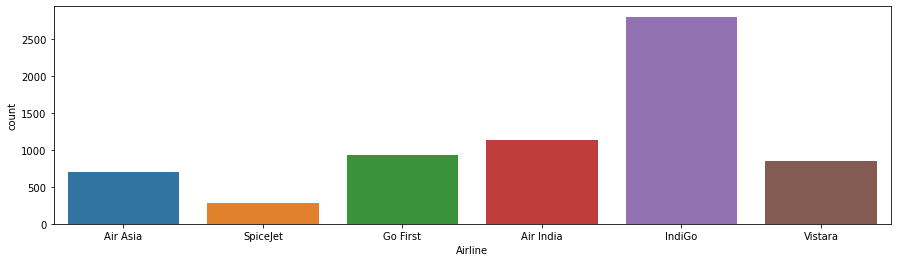

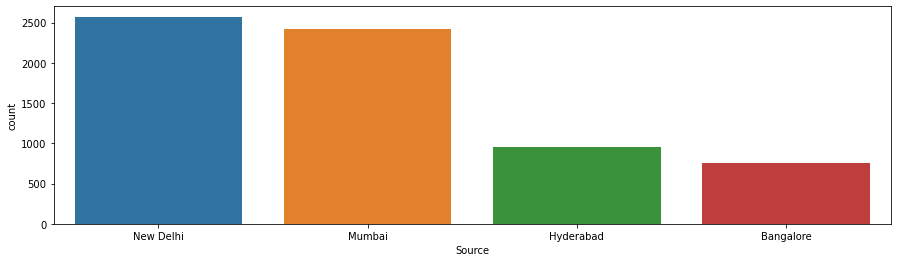

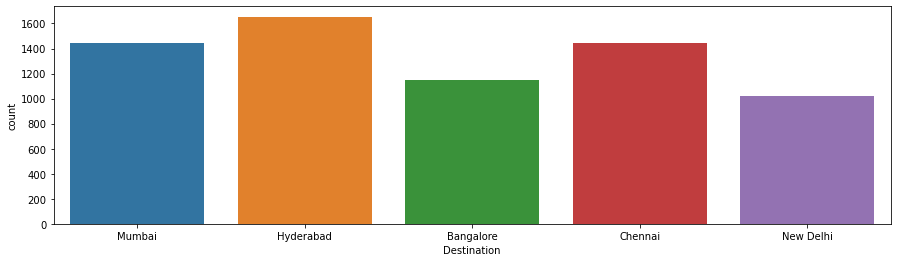

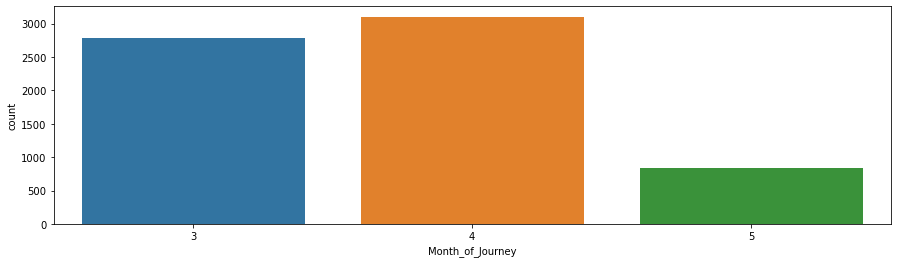

In [25]:
# Visualizing value counts for object type the columns
for i in df.columns :
    if (df[i].nunique()<10) :
        plt.figure(figsize=(15,4))
        sns.countplot(df[i])
        plt.show()

IndiGo is the most preferred airline, followed by Air India. Majority of the flights take off from New Delhi and then Mumbai. Maximum flights land in Hyderabad followed by Chennai and then Mumbai.Majority of the flights are non stop and least have no 2nd and 3rd stop. Majority data of flights is of April month.

In [26]:
# Describe dataset
df.describe()
#df.describe(include='all')

Date_of_Journey  Total_Stops        Price  Month_of_Journey  \
count      6710.000000  6710.000000  6710.000000       6710.000000   
mean         14.858122     0.394337  3630.084799          3.709687   
std           9.469148     0.520640  1349.296352          0.673417   
min           1.000000     0.000000  1341.000000          3.000000   
25%           7.000000     0.000000  2779.000000          3.000000   
50%          15.000000     0.000000  3201.000000          4.000000   
75%          23.000000     1.000000  4263.000000          4.000000   
max          31.000000     3.000000  9161.000000          5.000000   

       Dep_Time_Hour  Dep_Time_Minute  Arrival_Time_Hour  Arrival_Time_Minute  \
count    6710.000000      6710.000000        6710.000000          6710.000000   
mean       12.905365        25.321162          13.151565            26.973174   
std         5.994842        18.376833           6.700443            17.639528   
min         0.000000         0.000000           0.000000             0.000000   
25%         7.000000        10.000000           8.000000            10.000000   
50%        13.000000        25.000000          12.000000            25.000000   
75%        19.000000        45.000000          20.000000            45.000000   
max        23.000000        55.000000          23.000000            55.000000   

       Duration_hour  Duration_minute  
count    6710.000000      6710.000000  
mean        4.320119        26.331595  
std         4.805013        17.431925  
min         0.000000         0.000000  
25%         2.000000        10.000000  
50%         2.000000        25.000000  
75%         6.000000        45.000000  
max        29.000000        55.000000

Date_of_Journey ranges from 1-31, Total_Stops ranges from 0 to 3, Price ranges from 1341 to 9161, Month_of_Journey is from March to May, Dep_Time_Hour ranges from 0 to 23, Dep_Time_Minute ranges from 0-55, Arrival_Time_Hour ranges from 0-23, Arrival_Time_Minute ranges from 0-55, Duration_hour ranges from 0 to 29, Duration_minute ranges from 0-55.

Price,Arrival_Time_Hour,Arrival_Time_Minute,Duration_minute,Duration_hour have mean>median hence right skewness is there. 

Price,Duration_hour has high difference between 75% and max values hence outliers could be there but since Price is the target column we are not going to treat it.

Standard deviation seem high for Price.

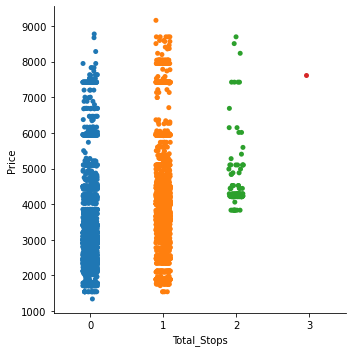

In [27]:
# Category plot for categorical data
sns.catplot(x='Total_Stops',y='Price',data=df,)

Flight prices are high with increase in total stops. Just a few flights have 3 stops.

In [28]:
sns.catplot(x='Destination',y='Price',data=df)

Highest prices have been for Mumbai as destination followed by Chennai. Also, starting price of Mumbai and New Delhi as destination is high.

In [29]:
# Pivot table showing counts
pd.crosstab(df['Total_Stops'],df['Airline'])

Airline      Air Asia  Air India  Go First  IndiGo  SpiceJet  Vistara
Total_Stops                                                          
0                 289        626       584    1713       223      736
1                 406        422       341    1086        59      119
2                  12         85         7       1         0        0
3                   0          1         0       0         0        0

All the flights mostly flies non-stop or with 1 stop and rarely with 2 or 3 stops.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

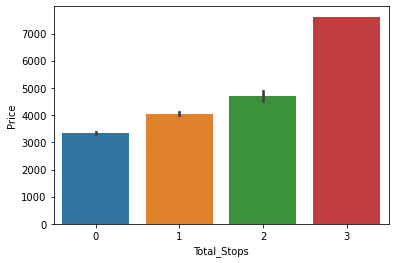

In [30]:
sns.barplot(x='Total_Stops',y='Price',data=df)

Here, Total_Stops and Price showing relationship that with increase in number of stops, prices also increases and hence 3 as Total_stops has highest Flight price and non-stop has lowest price range.

<AxesSubplot:xlabel='Airline', ylabel='Price'>

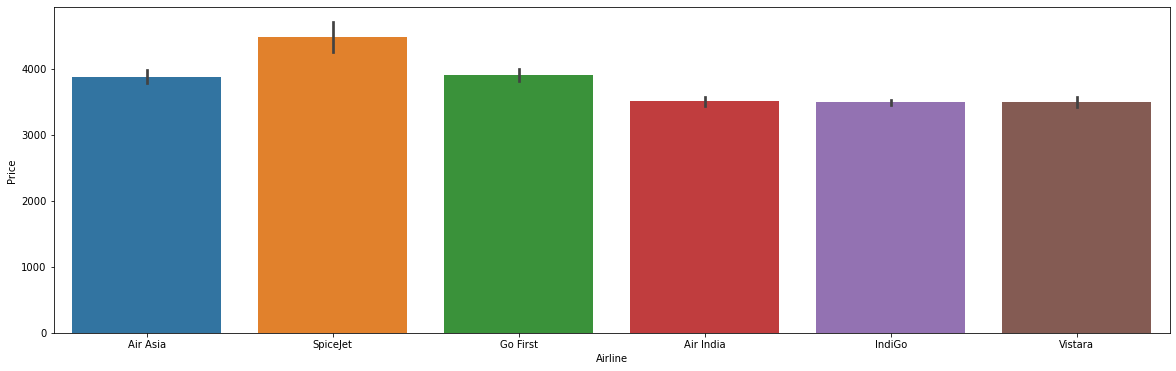

In [31]:
plt.figure(figsize=(20,6))
sns.barplot(x='Airline',y='Price',data=df)

Spicejet charges highest price as compared to others.

In [32]:
sns.lineplot(x='Total_Stops',y='Duration_hour',data=df)

<AxesSubplot:xlabel='Total_Stops', ylabel='Duration_hour'>

Plot showing duration is increasing with increase in number of total stops, ensuring we are good with our dataset.

In [33]:
sns.lineplot(x='Total_Stops',y='Price',data=df)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

Price is increasing with number of Total_Stops.

In [34]:
df.groupby('Source')['Price'].mean()

Source
Bangalore    3054.789404
Hyderabad    3637.059437
Mumbai       3315.026414
New Delhi    4092.986397
Name: Price, dtype: float64

Mean price is highest for Source Delhi.

In [35]:
df.groupby('Destination')['Price'].mean()

Destination
Bangalore    3939.558362
Chennai      4005.964755
Hyderabad    3439.227328
Mumbai       3298.495845
New Delhi    3527.153392
Name: Price, dtype: float64

Mean price is highest for Destination Chennai followed by Bangalore.

In [36]:
df.groupby('Total_Stops')['Price'].mean()

Total_Stops
0    3352.112683
1    4058.932594
2    4697.219048
3    7616.000000
Name: Price, dtype: float64

Mean price is highest for Total_Stops 3 and least is for 0 as Total_Stops.

In [37]:
df.groupby('Airline')['Price'].mean()

Airline
Air Asia     3879.196605
Air India    3502.634039
Go First     3900.006438
IndiGo       3486.708929
SpiceJet     4474.996454
Vistara      3489.766082
Name: Price, dtype: float64

Mean price is highest for Airline Jet SpiceJet and least is for IndiGo.

### Dividing the data in categorical and numeric columns

In [38]:
# Categorical data
df_cat=df.select_dtypes(include='object')
df_cat.head()

Airline     Source Destination
0  Air Asia  New Delhi      Mumbai
1  Air Asia  New Delhi      Mumbai
2  Air Asia  New Delhi      Mumbai
3  Air Asia  New Delhi      Mumbai
4  SpiceJet  New Delhi      Mumbai

In [39]:
# Continuous data
df_con=df.select_dtypes(exclude='object')

# Removing the target column
df_con.drop('Price',axis=1,inplace=True)

# Checking Dataset
df_con.head()

Date_of_Journey  Total_Stops  Month_of_Journey  Dep_Time_Hour  \
0                1            1                 3              8   
1                1            1                 3             20   
2                1            1                 3             19   
3                1            1                 3             22   
4                1            0                 3             19   

   Dep_Time_Minute  Arrival_Time_Hour  Arrival_Time_Minute  Duration_hour  \
0               20                 14                   10              5   
1               45                  7                   15             10   
2                0                  7                   15             12   
3               10                 12                   25             14   
4               45                 22                    5              2   

   Duration_minute  
0               50  
1               30  
2               15  
3               15  
4               20

In [40]:
# Checking outliers
from scipy.stats import zscore
z=np.abs(zscore(df_con))
np.where(z>3)

(array([ 355,  380,  410,  434,  508,  513,  513,  522,  522,  530,  534,
         535,  537,  702,  717,  717,  770,  770,  800,  801,  801,  859,
         860,  887,  888,  900,  905,  906,  929,  930,  931,  932,  933,
         949,  950,  951,  983,  984,  985,  986, 1012, 1013, 1077, 1086,
        1090, 1091, 1091, 1092, 1093, 1469, 1493, 1509, 1511, 1513, 1542,
        1543, 1564, 1565, 1566, 1568, 1592, 1593, 1594, 1613, 1614, 1616,
        1642, 1643, 1662, 1670, 1671, 1697, 1699, 1747, 1771, 1773, 1971,
        2026, 2055, 2283, 2307, 2364, 2366, 2382, 2388, 2389, 2390, 2390,
        2415, 2439, 2441, 2441, 2461, 2462, 2490, 2491, 2504, 2529, 2759,
        2760, 3019, 3031, 3038, 3038, 3059, 3060, 3120, 3123, 3123, 3180,
        3223, 3240, 3242, 3243, 3244, 3244, 3258, 3259, 3264, 3265, 3265,
        3294, 3296, 3297, 3317, 3318, 3319, 3334, 3349, 3350, 3372, 3372,
        3377, 3378, 3379, 3397, 3404, 3407, 3408, 3409, 3409, 3410, 3414,
        3439, 3448, 3454, 3455, 3511, 

Output showing there are presence of outliers in the columns.

In [41]:
# Checking the outlier in the dataset
z.head()

Date_of_Journey  Total_Stops  Month_of_Journey  Dep_Time_Hour  \
0         1.463612     1.163391          1.053938       0.818325   
1         1.463612     1.163391          1.053938       1.183545   
2         1.463612     1.163391          1.053938       1.016722   
3         1.463612     1.163391          1.053938       1.517190   
4         1.463612     0.757464          1.053938       1.016722   

   Dep_Time_Minute  Arrival_Time_Hour  Arrival_Time_Minute  Duration_hour  \
0         0.289580           0.126633             0.962296       0.141505   
1         1.070930           0.918152             0.678820       1.182162   
2         1.377988           0.918152             0.678820       1.598425   
3         0.833784           0.171877             0.111869       2.014688   
4         1.070930           1.320673             1.245771       0.482890   

   Duration_minute  
0         1.357863  
1         0.210457  
2         0.650097  
3         0.650097  
4         0.363245

In [42]:
# Visualising outliers
df_con.plot(kind='box',subplots=True,layout=(3,8), figsize=(20,10))
plt.show()

Outliers are present in columns Total_Stops, Month_of_Journey and Duration_hour but these columns have impact on target column hence we will not remove these outliers.

In [43]:
# Checking skewness
df_con.skew()

Date_of_Journey        0.134978
Total_Stops            0.778766
Month_of_Journey       0.422795
Dep_Time_Hour          0.044898
Dep_Time_Minute        0.053136
Arrival_Time_Hour     -0.234537
Arrival_Time_Minute    0.096519
Duration_hour          2.359694
Duration_minute        0.184525
dtype: float64

Skewness is present in columns Total_Stops and Duration_hour of the dataset as acceptable range is +/-0.5.

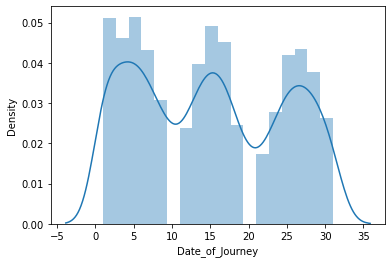

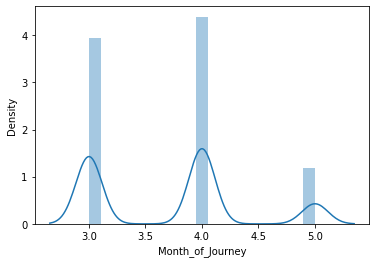

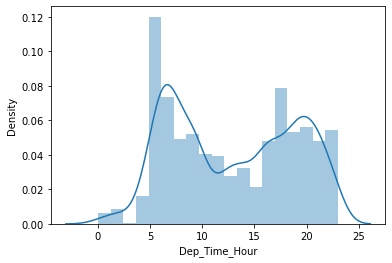

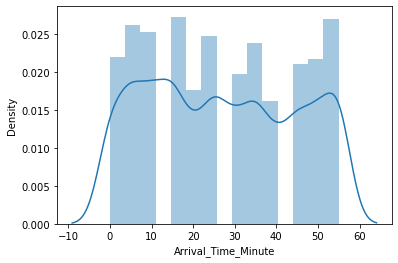

In [44]:
# Visualizing skewness
for i in df_con.columns :
    sns.distplot(df_con[i])
    plt.show()

We need to treat skewness for Total_Stops and Duration_hour columns, considering a threshold value for skewness as +/-0.5 (we will not transform ‘Price’ column, since it is our target variable).

### Data Cleaning

In [45]:
# Removing outliers
df1=df_con.copy()
df1=df_con[(z<5).all(axis=1)]
df1.head()

Date_of_Journey  Total_Stops  Month_of_Journey  Dep_Time_Hour  \
0                1            1                 3              8   
1                1            1                 3             20   
2                1            1                 3             19   
3                1            1                 3             22   
4                1            0                 3             19   

   Dep_Time_Minute  Arrival_Time_Hour  Arrival_Time_Minute  Duration_hour  \
0               20                 14                   10              5   
1               45                  7                   15             10   
2                0                  7                   15             12   
3               10                 12                   25             14   
4               45                 22                    5              2   

   Duration_minute  
0               50  
1               30  
2               15  
3               15  
4               20

In [46]:
# Printing shape of dataset before and after removing outliers
print('Shape of original dataset : ',df_con.shape)
print('Shape of dataset after removing outliers : ',df1.shape)

Shape of original dataset :  (6710, 9)
Shape of dataset after removing outliers :  (6708, 9)


In [48]:
# Percentage Data Lost
data_percent=(6710-6708)/1168*100
data_percent

0.17123287671232876

Approx 0.2% data is lost after removing the outliers.

In [49]:
# Checking skewness
df1.skew()

Date_of_Journey        0.134526
Total_Stops            0.765095
Month_of_Journey       0.422348
Dep_Time_Hour          0.044907
Dep_Time_Minute        0.053216
Arrival_Time_Hour     -0.234120
Arrival_Time_Minute    0.096649
Duration_hour          2.351191
Duration_minute        0.184652
dtype: float64

We can see now skewness is present in the columns : Total_Stops,Duration_hour.

In [50]:
# Removing skewness
df2=df1.copy()
df2['Total_Stops']=np.log(df1['Total_Stops']+1)
df2['Duration_hour']=np.log(df1['Duration_hour']+1)
df2.skew()

Date_of_Journey        0.134526
Total_Stops            0.585899
Month_of_Journey       0.422348
Dep_Time_Hour          0.044907
Dep_Time_Minute        0.053216
Arrival_Time_Hour     -0.234120
Arrival_Time_Minute    0.096649
Duration_hour          0.893106
Duration_minute        0.184652
dtype: float64

Removed skewness from Total_Stops,Duration_hour. But skewness is still there.

In [51]:
# Further removing skewness 
df2['Total_Stops']=np.log(df2['Total_Stops']+1)
df2['Duration_hour']=np.log(df2['Duration_hour']+1)
df2.skew()

Date_of_Journey        0.134526
Total_Stops            0.540985
Month_of_Journey       0.422348
Dep_Time_Hour          0.044907
Dep_Time_Minute        0.053216
Arrival_Time_Hour     -0.234120
Arrival_Time_Minute    0.096649
Duration_hour          0.521802
Duration_minute        0.184652
dtype: float64

Removed skewness from all columns but in columns and let's consider the present values as skewness threshold based on the kind of data distribution.

In [52]:
# Checking the new dataset
df2

Date_of_Journey  Total_Stops  Month_of_Journey  Dep_Time_Hour  \
0                   1     0.526589                 3              8   
1                   1     0.526589                 3             20   
2                   1     0.526589                 3             19   
3                   1     0.526589                 3             22   
4                   1     0.000000                 3             19   
...               ...          ...               ...            ...   
6747               31     0.526589                 5             16   
6748               31     0.526589                 5              9   
6749               31     0.526589                 5              6   
6750               31     0.526589                 5              5   
6751               31     0.526589                 5              5   

      Dep_Time_Minute  Arrival_Time_Hour  Arrival_Time_Minute  Duration_hour  \
0                  20                 14                   10       1.026672   
1                  45                  7                   15       1.223156   
2                   0                  7                   15       1.271150   
3                  10                 12                   25       1.310506   
4                  45                 22                    5       0.741276   
...               ...                ...                  ...            ...   
6747               40                  6                   50       1.310506   
6748               30                  6                   50       1.408800   
6749                5                  6                   50       1.439569   
6750               50                 14                    5       1.162283   
6751               25                  9                   50       0.959135   

      Duration_minute  
0                  50  
1                  30  
2                  15  
3                  15  
4                  20  
...               ...  
6747               10  
6748               20  
6749               45  
6750               15  
6751               25  

[6708 rows x 9 columns]

# Apply encoding on categorical columns

In [53]:
# Checking for the unique values
for i in df_cat.columns :
    print(i)
    print(df_cat[i].unique())

Airline
['Air Asia' 'SpiceJet' 'Go First' 'Air India' 'IndiGo' 'Vistara']
Source
['New Delhi' 'Mumbai' 'Hyderabad' 'Bangalore']
Destination
['Mumbai' 'Hyderabad' 'Bangalore' 'Chennai' 'New Delhi']


In [54]:
# Encoding values manually
src_dict={'New Delhi':1, 'Mumbai':2, 'Hyderabad':3, 'Bangalore':4}
dest_dict={'New Delhi':1, 'Mumbai':2, 'Hyderabad':3, 'Bangalore':4, 'Chennai':5}

df_cat_enc=df_cat.copy()
df_cat_enc['Source']=df_cat_enc['Source'].map(src_dict)
df_cat_enc['Destination']=df_cat_enc['Destination'].map(dest_dict)
df_cat_enc

Airline  Source  Destination
0      Air Asia       1            2
1      Air Asia       1            2
2      Air Asia       1            2
3      Air Asia       1            2
4      SpiceJet       1            2
...         ...     ...          ...
6747  Air India       2            3
6748  Air India       2            3
6749  Air India       2            3
6750   Go First       2            3
6751  Air India       2            3

[6710 rows x 3 columns]

In [55]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_cat_enc['Airline']=le.fit_transform(df_cat['Airline'])
df_cat_enc

Airline  Source  Destination
0           0       1            2
1           0       1            2
2           0       1            2
3           0       1            2
4           4       1            2
...       ...     ...          ...
6747        1       2            3
6748        1       2            3
6749        1       2            3
6750        2       2            3
6751        1       2            3

[6710 rows x 3 columns]

Categorical columns with object datatypes are now encoded having 6710 rows and 3 columns.

### Combining numerical and categorical data for further analysis

In [56]:
dff=pd.concat([df_con,df_cat_enc,df['Price']],axis=1)

# Dropping the nulls after concatination, if any
dff.dropna(inplace=True)

# Checking the null values
dff.isnull().sum().any()

False

Combined all the columns and removed nulls

In [57]:
# Checking shape of new dataset
dff.shape

(6710, 13)

New dataset is having 6710 rows and 13 columns.

In [58]:
# Checking dataset values
dff

Date_of_Journey  Total_Stops  Month_of_Journey  Dep_Time_Hour  \
0                   1            1                 3              8   
1                   1            1                 3             20   
2                   1            1                 3             19   
3                   1            1                 3             22   
4                   1            0                 3             19   
...               ...          ...               ...            ...   
6747               31            1                 5             16   
6748               31            1                 5              9   
6749               31            1                 5              6   
6750               31            1                 5              5   
6751               31            1                 5              5   

      Dep_Time_Minute  Arrival_Time_Hour  Arrival_Time_Minute  Duration_hour  \
0                  20                 14                   10              5   
1                  45                  7                   15             10   
2                   0                  7                   15             12   
3                  10                 12                   25             14   
4                  45                 22                    5              2   
...               ...                ...                  ...            ...   
6747               40                  6                   50             14   
6748               30                  6                   50             21   
6749                5                  6                   50             24   
6750               50                 14                    5              8   
6751               25                  9                   50              4   

      Duration_minute  Airline  Source  Destination  Price  
0                  50        0       1            2   5952  
1                  30        0       1            2   5952  
2                  15        0       1            2   5952  
3                  15        0       1            2   5952  
4                  20        4       1            2   5953  
...               ...      ...     ...          ...    ...  
6747               10        1       2            3   3644  
6748               20        1       2            3   3644  
6749               45        1       2            3   3644  
6750               15        2       2            3   3687  
6751               25        1       2            3   3728  

[6710 rows x 13 columns]

All the required columns are encoded and are in numeric form.

### EDA and Visualizatons

In [59]:
# Describng the dataset
dff.describe()

Date_of_Journey  Total_Stops  Month_of_Journey  Dep_Time_Hour  \
count      6710.000000  6710.000000       6710.000000    6710.000000   
mean         14.858122     0.394337          3.709687      12.905365   
std           9.469148     0.520640          0.673417       5.994842   
min           1.000000     0.000000          3.000000       0.000000   
25%           7.000000     0.000000          3.000000       7.000000   
50%          15.000000     0.000000          4.000000      13.000000   
75%          23.000000     1.000000          4.000000      19.000000   
max          31.000000     3.000000          5.000000      23.000000   

       Dep_Time_Minute  Arrival_Time_Hour  Arrival_Time_Minute  Duration_hour  \
count      6710.000000        6710.000000          6710.000000    6710.000000   
mean         25.321162          13.151565            26.973174       4.320119   
std          18.376833           6.700443            17.639528       4.805013   
min           0.000000           0.000000             0.000000       0.000000   
25%          10.000000           8.000000            10.000000       2.000000   
50%          25.000000          12.000000            25.000000       2.000000   
75%          45.000000          20.000000            45.000000       6.000000   
max          55.000000          23.000000            55.000000      29.000000   

       Duration_minute      Airline       Source  Destination        Price  
count      6710.000000  6710.000000  6710.000000  6710.000000  6710.000000  
mean         26.331595     2.503875     1.984501     3.084054  3630.084799  
std          17.431925     1.438427     0.988108     1.359541  1349.296352  
min           0.000000     0.000000     1.000000     1.000000  1341.000000  
25%          10.000000     1.000000     1.000000     2.000000  2779.000000  
50%          25.000000     3.000000     2.000000     3.000000  3201.000000  
75%          45.000000     3.000000     3.000000     4.000000  4263.000000  
max          55.000000     5.000000     4.000000     5.000000  9161.000000

In above table, mean and median are almost similar hence could not see skewness and also the difference of 75 percentle and max value is not much hence no outliers are present n the dataset. Standard deviation is high only for few columns, rest all details seem good.

In [60]:
# Checking correlation
dff.corr()

Date_of_Journey  Total_Stops  Month_of_Journey  \
Date_of_Journey             1.000000    -0.048332         -0.079950   
Total_Stops                -0.048332     1.000000         -0.096858   
Month_of_Journey           -0.079950    -0.096858          1.000000   
Dep_Time_Hour               0.001528    -0.022760          0.003532   
Dep_Time_Minute            -0.038917    -0.007864         -0.021371   
Arrival_Time_Hour           0.020261     0.002647          0.033603   
Arrival_Time_Minute         0.005005    -0.007320          0.032421   
Duration_hour              -0.004997     0.741963         -0.041937   
Duration_minute             0.018220     0.049789         -0.120448   
Airline                    -0.010378    -0.243861         -0.052695   
Source                     -0.005811    -0.035055          0.034453   
Destination                -0.003589     0.189013         -0.202246   
Price                      -0.325656     0.271467         -0.406203   

                     Dep_Time_Hour  Dep_Time_Minute  Arrival_Time_Hour  \
Date_of_Journey           0.001528        -0.038917           0.020261   
Total_Stops              -0.022760        -0.007864           0.002647   
Month_of_Journey          0.003532        -0.021371           0.033603   
Dep_Time_Hour             1.000000         0.095005           0.222649   
Dep_Time_Minute           0.095005         1.000000           0.052589   
Arrival_Time_Hour         0.222649         0.052589           1.000000   
Arrival_Time_Minute       0.027765         0.036842           0.021632   
Duration_hour            -0.027268        -0.040327          -0.050748   
Duration_minute           0.057525         0.019615           0.010376   
Airline                  -0.046999         0.111586           0.124487   
Source                    0.081783         0.099187          -0.039718   
Destination              -0.021774         0.041009           0.010546   
Price                    -0.020488         0.016756          -0.062006   

                     Arrival_Time_Minute  Duration_hour  Duration_minute  \
Date_of_Journey                 0.005005      -0.004997         0.018220   
Total_Stops                    -0.007320       0.741963         0.049789   
Month_of_Journey                0.032421      -0.041937        -0.120448   
Dep_Time_Hour                   0.027765      -0.027268         0.057525   
Dep_Time_Minute                 0.036842      -0.040327         0.019615   
Arrival_Time_Hour               0.021632      -0.050748         0.010376   
Arrival_Time_Minute             1.000000       0.038261         0.113160   
Duration_hour                   0.038261       1.000000         0.010276   
Duration_minute                 0.113160       0.010276         1.000000   
Airline                         0.020994      -0.223145        -0.019599   
Source                         -0.011372      -0.074237         0.121093   
Destination                     0.016204       0.095955         0.189019   
Price                           0.026919       0.261786         0.109927   

                      Airline    Source  Destination     Price  
Date_of_Journey     -0.010378 -0.005811    -0.003589 -0.325656  
Total_Stops         -0.243861 -0.035055     0.189013  0.271467  
Month_of_Journey    -0.052695  0.034453    -0.202246 -0.406203  
Dep_Time_Hour       -0.046999  0.081783    -0.021774 -0.020488  
Dep_Time_Minute      0.111586  0.099187     0.041009  0.016756  
Arrival_Time_Hour    0.124487 -0.039718     0.010546 -0.062006  
Arrival_Time_Minute  0.020994 -0.011372     0.016204  0.026919  
Duration_hour       -0.223145 -0.074237     0.095955  0.261786  
Duration_minute     -0.019599  0.121093     0.189019  0.109927  
Airline              1.000000 -0.005411     0.072394 -0.037827  
Source              -0.005411  1.000000    -0.261438 -0.229525  
Destination          0.072394 -0.261438     1.000000  0.173172  
Price               -0.037827 -0.229525     0.173172  1.000000

<AxesSubplot:>

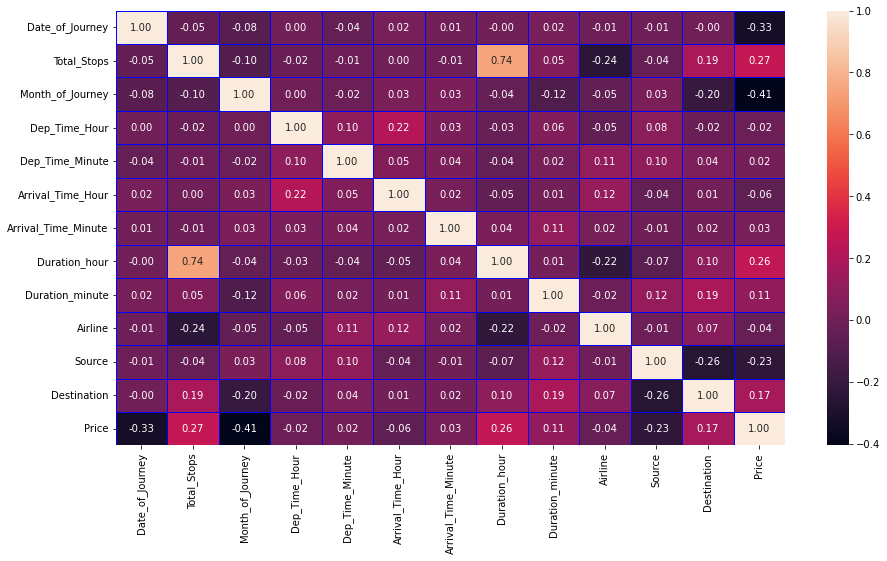

In [61]:
# Visualizing correlation
plt.figure(figsize=(15,8))
sns.heatmap(dff.corr(),annot=True,linewidths=0.5,linecolor='b',fmt='.2f')

Target 'Price' has strong linear correlation with Month_of_Journey and good correlation with Date_of_Journey, Total_Stops, Duration_hour and Source.

Arrival_Time_hour has good correlation with Dep_Time_Hour. Duration_hour has strong correlation with Total_Stops. Airline has good correlation with Total_stops, Duration_hour. Destination has good correlation with Month_of_Journey, Source.

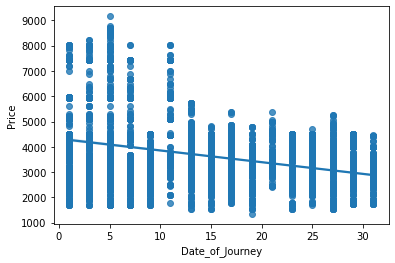

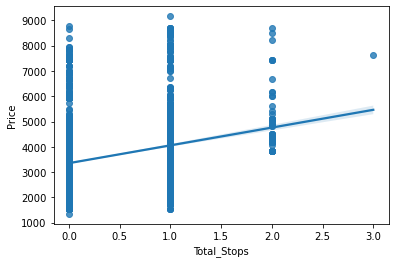

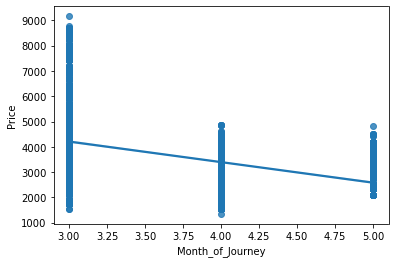

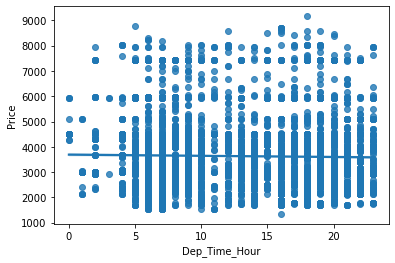

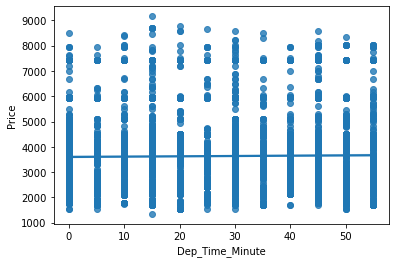

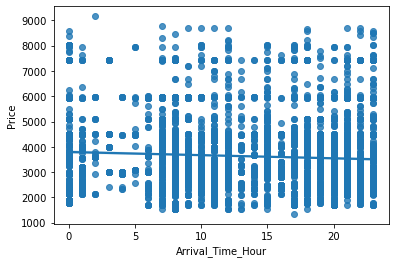

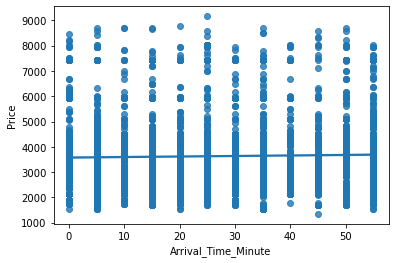

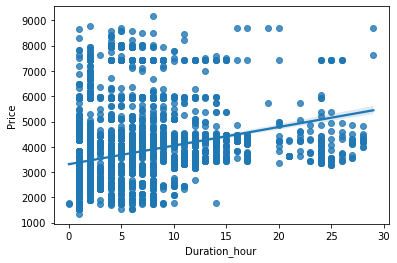

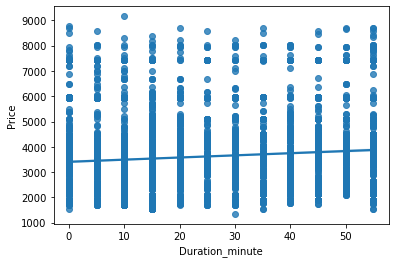

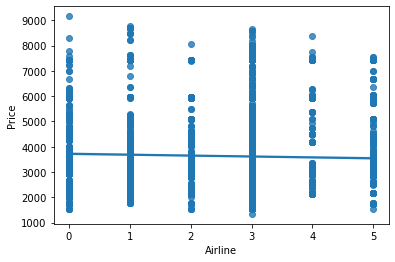

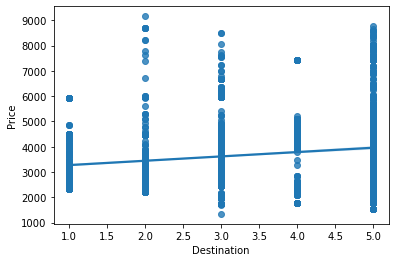

In [62]:
# Visualizing with regression plot
for i in dff.columns :
    sns.regplot(dff[i],dff['Price'])
    plt.show()

'Price' has strong linear correlation with Month_of_Journey and good correlation with Date_of_Journey,Total_Stops, Duration_hour and Source.

### Dividing dataset in x and y

In [63]:
x=dff.drop('Price',axis=1)
x

Date_of_Journey  Total_Stops  Month_of_Journey  Dep_Time_Hour  \
0                   1            1                 3              8   
1                   1            1                 3             20   
2                   1            1                 3             19   
3                   1            1                 3             22   
4                   1            0                 3             19   
...               ...          ...               ...            ...   
6747               31            1                 5             16   
6748               31            1                 5              9   
6749               31            1                 5              6   
6750               31            1                 5              5   
6751               31            1                 5              5   

      Dep_Time_Minute  Arrival_Time_Hour  Arrival_Time_Minute  Duration_hour  \
0                  20                 14                   10              5   
1                  45                  7                   15             10   
2                   0                  7                   15             12   
3                  10                 12                   25             14   
4                  45                 22                    5              2   
...               ...                ...                  ...            ...   
6747               40                  6                   50             14   
6748               30                  6                   50             21   
6749                5                  6                   50             24   
6750               50                 14                    5              8   
6751               25                  9                   50              4   

      Duration_minute  Airline  Source  Destination  
0                  50        0       1            2  
1                  30        0       1            2  
2                  15        0       1            2  
3                  15        0       1            2  
4                  20        4       1            2  
...               ...      ...     ...          ...  
6747               10        1       2            3  
6748               20        1       2            3  
6749               45        1       2            3  
6750               15        2       2            3  
6751               25        1       2            3  

[6710 rows x 12 columns]

In [64]:
y=dff['Price']
y

0       5952
1       5952
2       5952
3       5952
4       5953
        ... 
6747    3644
6748    3644
6749    3644
6750    3687
6751    3728
Name: Price, Length: 6710, dtype: int64

In [65]:
# Checking shapes of x and y 
print('Shape of x : ',x.shape)
print('Shape of y : ',y.shape)

Shape of x :  (6710, 12)
Shape of y :  (6710,)


### Multicollinearity with VIF

In [66]:
# Imporing required libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
# Checking multicollinearity of every column
def calc_vif(x) :
    vif=pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

calc_vif(x)

Variables  VIF Factors
0       Date_of_Journey     3.284298
1           Total_Stops     3.788841
2      Month_of_Journey    13.867808
3         Dep_Time_Hour     5.844373
4       Dep_Time_Minute     2.994157
5     Arrival_Time_Hour     5.203013
6   Arrival_Time_Minute     3.372302
7         Duration_hour     4.114570
8       Duration_minute     3.560989
9               Airline     4.292807
10               Source     5.263038
11          Destination     6.347486

In dataset, among multicolnear columns the features that are contributing less to the output variable can be dropped. We can drop 1-2 columns showing high colinearity but not all as it impacts the output.

Machine learning needs refined dataset. It needs only those columns that are highly contributing to the output. Clean data for which EDA is used. This is for better learning and prediction of data by models.

Once refining is done we'll do Standard Scaler to make all data scaled to mean=0 and std.dev.=+-1, so that prediction could be nearby.

### Scaling : Standard Scaler / Min-Max Scaler

In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xs=sc.fit_transform(x)
x2=pd.DataFrame(xs,columns=x.columns)
x2

Date_of_Journey  Total_Stops  Month_of_Journey  Dep_Time_Hour  \
0           -1.463612     1.163391         -1.053938      -0.818325   
1           -1.463612     1.163391         -1.053938       1.183545   
2           -1.463612     1.163391         -1.053938       1.016722   
3           -1.463612     1.163391         -1.053938       1.517190   
4           -1.463612    -0.757464         -1.053938       1.016722   
...               ...          ...               ...            ...   
6705         1.704808     1.163391          1.916210       0.516255   
6706         1.704808     1.163391          1.916210      -0.651503   
6707         1.704808     1.163391          1.916210      -1.151970   
6708         1.704808     1.163391          1.916210      -1.318793   
6709         1.704808     1.163391          1.916210      -1.318793   

      Dep_Time_Minute  Arrival_Time_Hour  Arrival_Time_Minute  Duration_hour  \
0           -0.289580           0.126633            -0.962296       0.141505   
1            1.070930          -0.918152            -0.678820       1.182162   
2           -1.377988          -0.918152            -0.678820       1.598425   
3           -0.833784          -0.171877            -0.111869       2.014688   
4            1.070930           1.320673            -1.245771      -0.482890   
...               ...                ...                  ...            ...   
6705         0.798828          -1.067407             1.305508       2.014688   
6706         0.254624          -1.067407             1.305508       3.471609   
6707        -1.105886          -1.067407             1.305508       4.096003   
6708         1.343032           0.126633            -1.245771       0.765899   
6709        -0.017478          -0.619642             1.305508      -0.066627   

      Duration_minute   Airline    Source  Destination  
0            1.357863 -1.740834 -0.996423    -0.797427  
1            0.210457 -1.740834 -0.996423    -0.797427  
2           -0.650097 -1.740834 -0.996423    -0.797427  
3           -0.650097 -1.740834 -0.996423    -0.797427  
4           -0.363245  1.040190 -0.996423    -0.797427  
...               ...       ...       ...          ...  
6705        -0.936948 -1.045578  0.015687    -0.061830  
6706        -0.363245 -1.045578  0.015687    -0.061830  
6707         1.071012 -1.045578  0.015687    -0.061830  
6708        -0.650097 -0.350322  0.015687    -0.061830  
6709        -0.076394 -1.045578  0.015687    -0.061830  

[6710 rows x 12 columns]

### Find best random state for Train-Test Split

In [69]:
#Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import time

In [70]:
#Finding out the best random state

maxAcc=0
rs=0
for i in range(0,100) :
    x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.2,random_state=i)
    
    dtc=DecisionTreeRegressor()
    dtc.fit(x_train,y_train)
    predtrain=dtc.predict(x_train)
    predtest=dtc.predict(x_test)
    acctrain=r2_score(y_train,predtrain)
    acctest=r2_score(y_test,predtest)
    #if round(acctrain,2)==round(acctest,2) :
    #    print('Best random state : ',i,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',acctest*100)
        
    if acctest>maxAcc :
        maxAcc=acctest
        rs=i      
print('Random state with maximum accuracy : ',rs,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',maxAcc*100)

Random state with maximum accuracy :  78  Accuracy(Training) :  99.98779725407975  Accuracy(Testing) :  93.72489003966096


Here, training & testing accuracies are almost same for random state=78. So, lets take 78 as our best random state.

In [71]:
# train-test split with best randon state and finding the train and test set shape after splittng
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.2,random_state=78)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5368, 12)
(1342, 12)
(5368,)
(1342,)


In [72]:
y_train.value_counts()

3002    285
2915    270
2901    238
4500    196
2476    136
       ... 
3865      1
7395      1
4327      1
4158      1
5417      1
Name: Price, Length: 421, dtype: int64

Huge difference is there in both classes of training set hence balancing the class now.

### Finding the best algorithm

In [73]:
# Making instance of regressors
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
xg=GradientBoostingRegressor()

In [74]:
#Executing all algorithms in a single for loop
algo_list=[dtr,knn,rf,xg]

for i in algo_list :  
    print(i)
    i.fit(x_train,y_train)
    predtrain=i.predict(x_train)
    predtest=i.predict(x_test)
    acctrain=r2_score(y_train,predtrain)
    acctest=r2_score(y_test,predtest)
    err1=mean_absolute_error(y_test,predtest)
    err2=mean_squared_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain*100,' Accuracy(Test) ',acctest*100)
    print('mean_absolute_error',mean_absolute_error(y_test,predtest))
    print('mean_squared_error',mean_squared_error(y_test,predtest))
    print('\n')

DecisionTreeRegressor()
Accuracy(Training) :  100.0  Accuracy(Test)  93.01887518705404
mean_absolute_error 137.96795827123697
mean_squared_error 126150.02459016393


KNeighborsRegressor()
Accuracy(Training) :  85.63061596807758  Accuracy(Test)  78.69751891105864
mean_absolute_error 366.15081967213115
mean_squared_error 384939.1874813711


RandomForestRegressor()
Accuracy(Training) :  99.22401472033701  Accuracy(Test)  96.0370900740719
mean_absolute_error 136.45089418777943
mean_squared_error 71610.40634560358


GradientBoostingRegressor()
Accuracy(Training) :  88.39913712233928  Accuracy(Test)  89.63561902109599
mean_absolute_error 308.58826509062135
mean_squared_error 187285.996223126




Looking at difference of accuracy and cv mean, opting for RandomForestRegressor as our best model with accuracy of 89% and having least difference between accuracy and cv mean.

### Hyperparameter Tuning

In [75]:
# Using hyper parameter tuning on selected model for better accuracy and to avoid overfitting issues
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10,50,100],
              'criterion':['squared_error','absolute_error','poisson'],
              'max_features':['auto','sqrt','log2'],
              'max_depth':[None,1,2,3]}
              
rf=RandomForestRegressor()
GCV=GridSearchCV(rf,parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'poisson',
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 100}

Using hyper parameter tuning for better accuracy and to avoid overfitting issues with best parameters on selected model.

In [76]:
from sklearn.model_selection import cross_val_score

rf=RandomForestRegressor(criterion='poisson',max_depth=None,max_features='log2',n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=r2_score(y_test,pred)

print('Accuracy : ',acc)

Accuracy :  0.858721851344798


#### We are getting model accuracy as approx 86%, this shows our model is performing good.

### AUC-ROC Curve

AUC-ROC is not available for regression problems, because there is no cut-off value for this algorithm, and ROC AUC is only calculable in the case if the algorithm returns a continuous probability value (and only 1 value) for an unseen element.

### Saving the model

In [77]:
# Saved the model in .pkl file
import pickle #import joblib
file='flight_price.pkl'
pickle.dump(rf,open(file,'wb'))

### Conclusion

In [78]:
# Loading the model for checking score on actual and predicted test sets
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)
result

0.858721851344798

In [79]:
#Printing the shapes of test sets to make comparison dataframe
print(x_test.shape)
print(y_test.shape)

(1342, 12)
(1342,)


In [80]:
# Comparison dataframe having Original and Predicted values
actual=np.array(y_test)
predicted=np.array(rf.predict(x_test))
conclusion=pd.DataFrame({'Orignal':actual,'Predicted':predicted.astype(int)})
conclusion[:30]

Orignal  Predicted
0      2915       2958
1      2860       3083
2      2915       2882
3      3020       3117
4      2423       2652
5      1776       2997
6      1714       2641
7      2467       2991
8      3200       3261
9      3734       3221
10     2464       2879
11     2600       2907
12     3420       3389
13     2901       2858
14     5955       6041
15     2800       3638
16     3360       3311
17     5953       6538
18     2153       2289
19     4223       4085
20     4500       4521
21     2335       2462
22     2901       2923
23     2126       2966
24     2349       2350
25     4499       4533
26     1890       2268
27     2132       2227
28     3002       3363
29     3571       3638